In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier,BallTree,KDTree
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
sns.set_style('darkgrid')

In [24]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

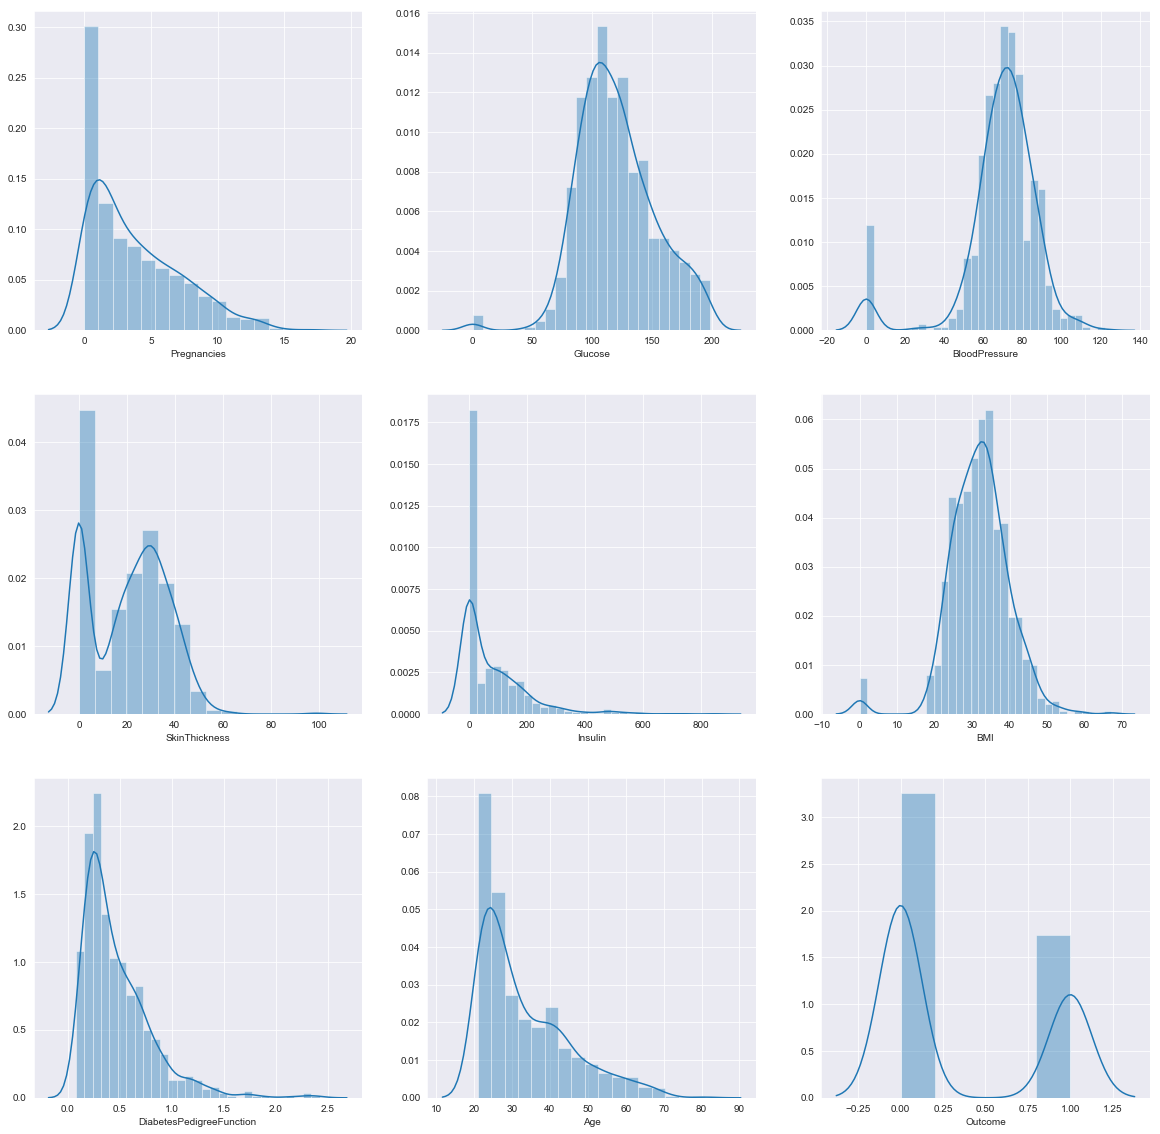

In [27]:
plt.figure(figsize=(20,20) , facecolor='white')
plotnumber = 1
for col in data:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[col])
    plt.xlabel(col)
    plotnumber = plotnumber + 1

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [28]:
# replace 0 with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

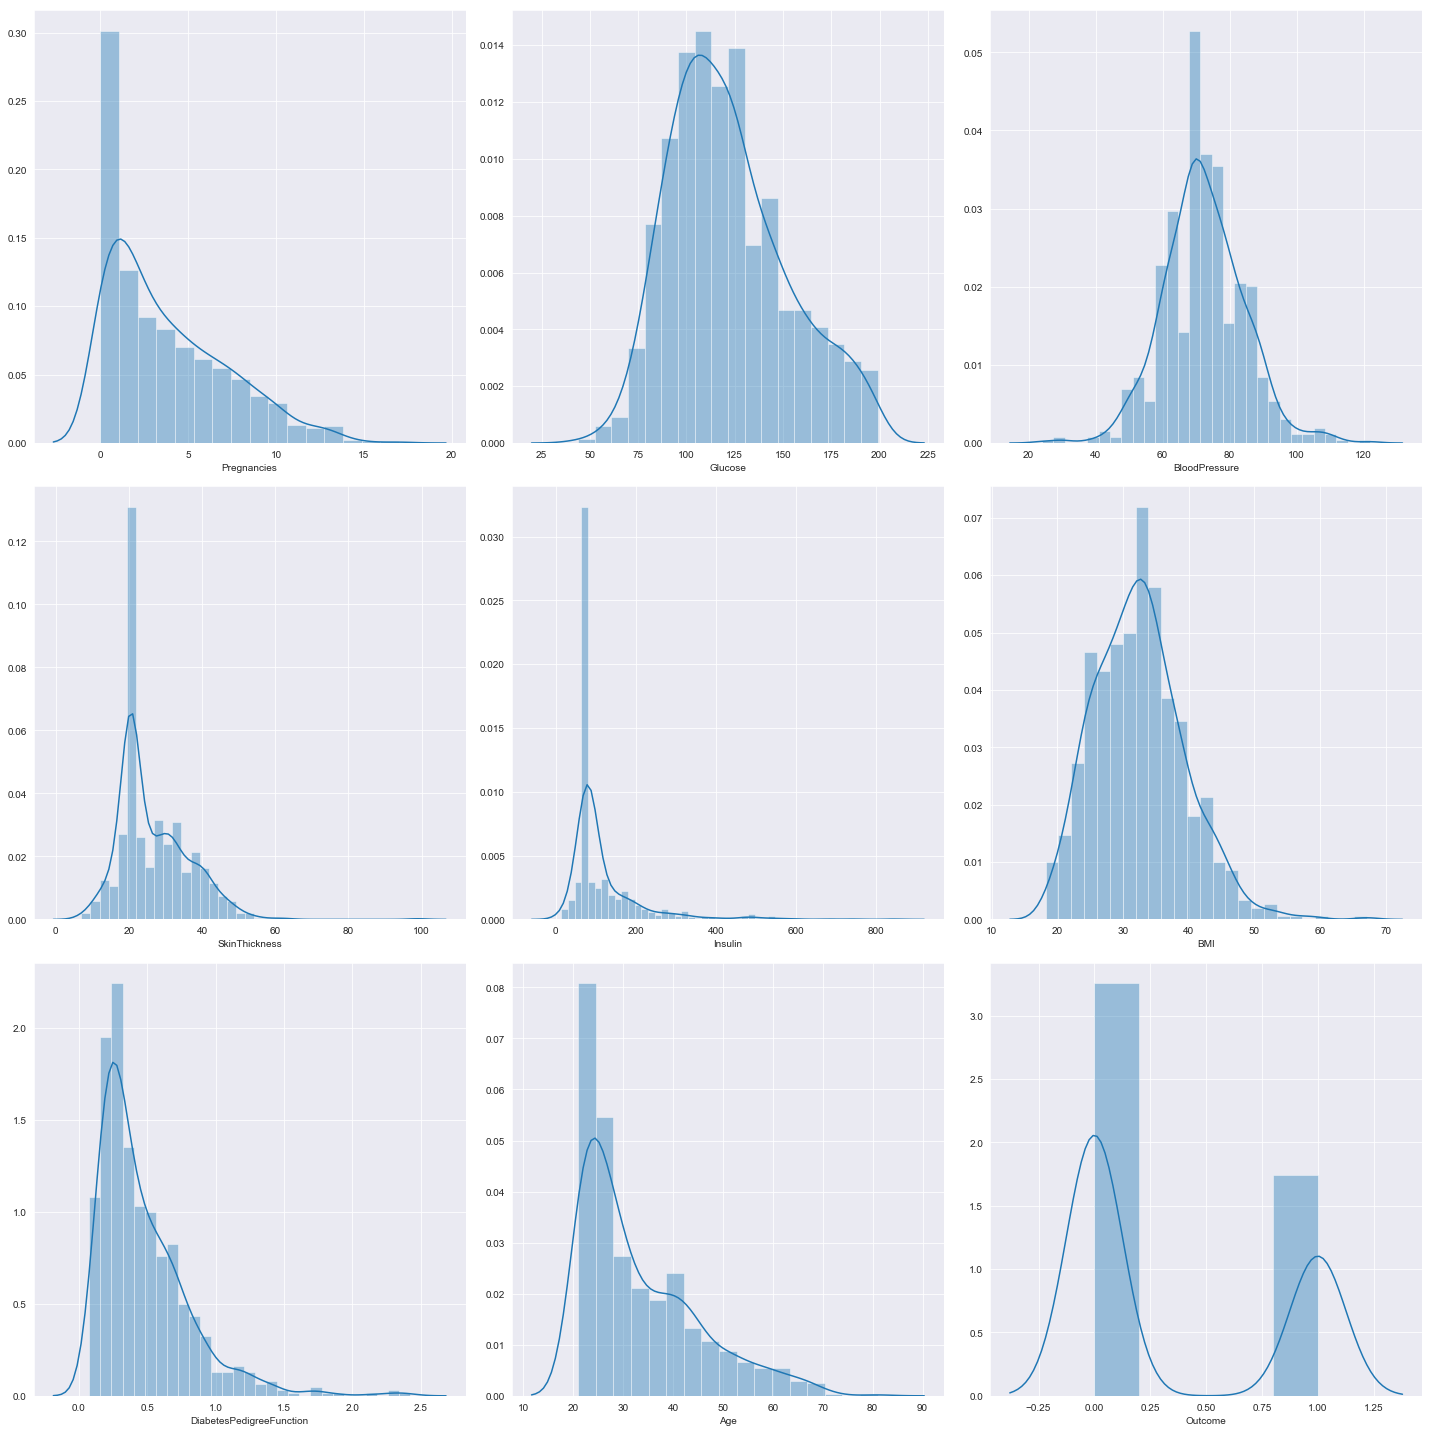

In [29]:
plt.figure(figsize=(20,20) , facecolor='white')
plotnumber = 1
for col in data:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[col])
    plt.xlabel(col)
    plotnumber = plotnumber + 1
plt.tight_layout()

there is sknewness in the dataset so will try to remove it with the help of logrithm 

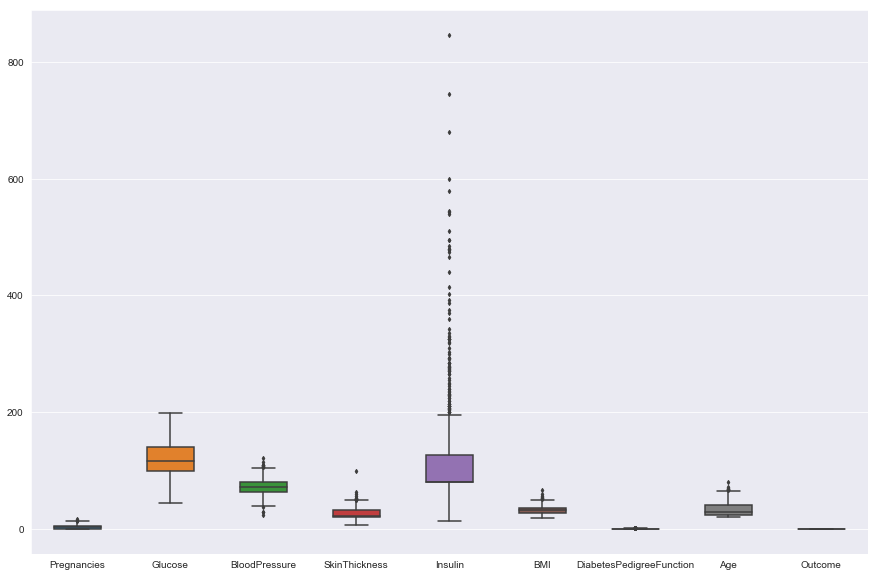

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [40]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [47]:
X = data.drop(columns='Outcome')
y = data['Outcome']

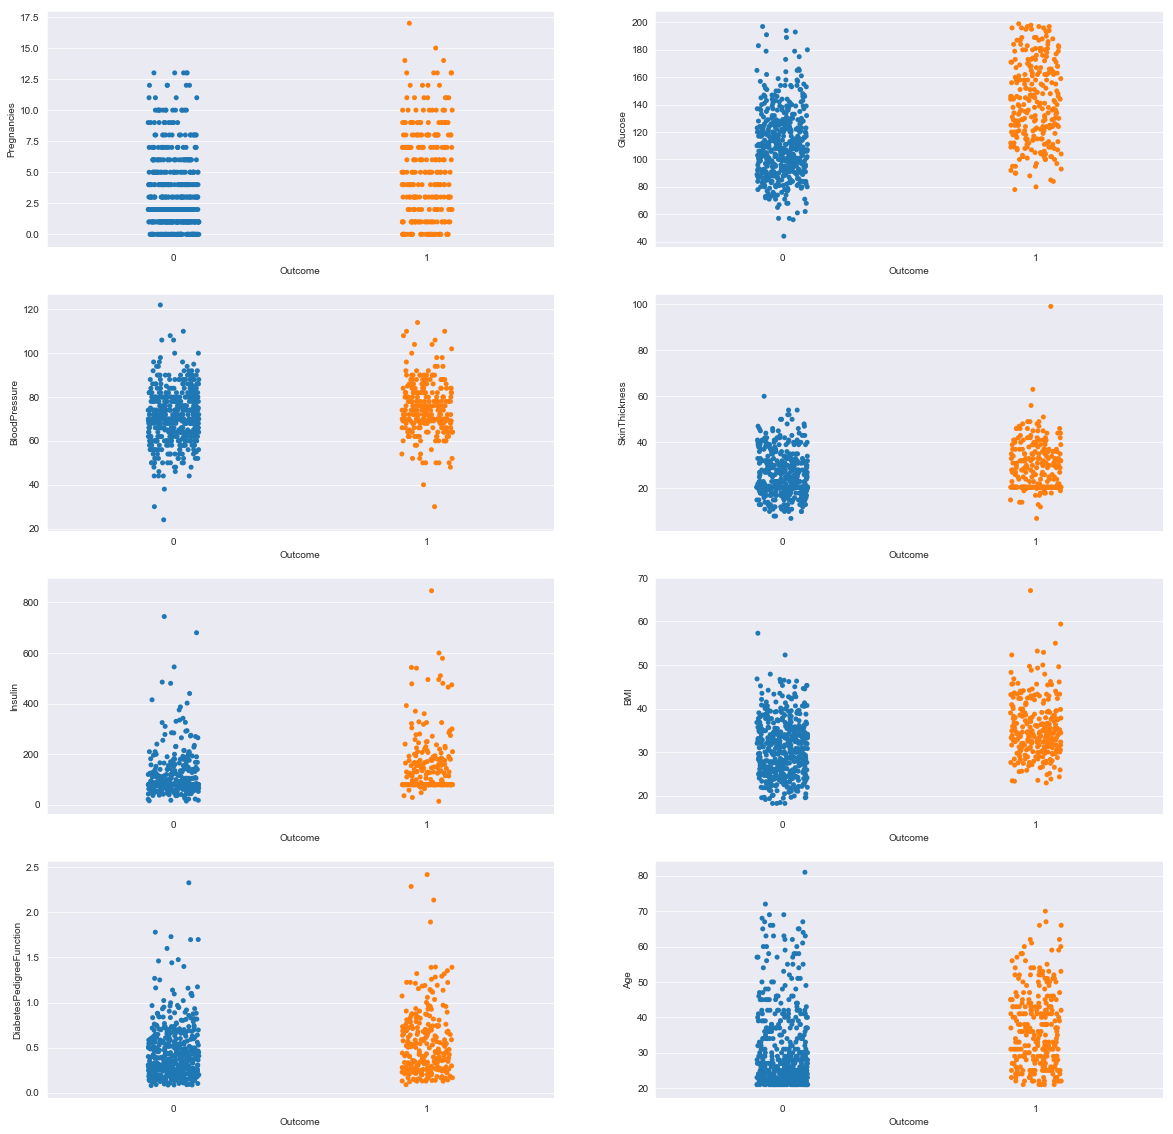

In [54]:
plt.figure(figsize=(20,20))
plotnumber = 1
for col in data:
    if plotnumber<9:
        ax = plt.subplot(4,2,plotnumber)
        sns.stripplot(y,X[col])
    plotnumber = plotnumber +1

In [56]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [59]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0)

In [60]:
model = KNeighborsClassifier()
model.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
model.score(X_test , y_test)

0.7229437229437229

In [63]:
accuracy_score(y_test,model.predict(X_test))

0.7229437229437229

In [77]:
grid_param = {
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [18,20,25,27,30,32,34],
    'n_neighbors':[3,5,7,9,11,13,15,17]
}

In [78]:
grid_search = GridSearchCV(estimator=model ,param_grid=grid_param, cv=5 , verbose=3 )
grid_search.fit(X_train , y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.6759259259259259, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.7037037037037037, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.7222222222222222, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.6822429906542056, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.7169811320754716, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.6635514018691588, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.7924528301886793, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.7037037037037037, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.7222222222222222, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.7407407407407407, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.6542056074766355, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ...............

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.6635514018691588, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=9, score=0.7452830188679245, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.7129629629629629, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.7129629629629629, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.7222222222222222, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.6542056074766355, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ..........

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.6635514018691588, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=13, score=0.7547169811320755, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=15, score=0.7037037037037037, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=15, score=0.6851851851851852, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=15, score=0.6666666666666666, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=15, score=0.6635514018691588, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=15 ........

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.7222222222222222, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.6822429906542056, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.7169811320754716, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.7037037037037037, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.6944444444444444, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.7129629629629629, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ...............

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.7407407407407407, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.6635514018691588, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.7452830188679245, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.7129629629629629, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.7129629629629629, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.7222222222222222, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...........

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=13, score=0.7037037037037037, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=13, score=0.7037037037037037, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=13, score=0.6635514018691588, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=13, score=0.7547169811320755, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=15, score=0.7037037037037037, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=15 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=15, score=0.6851851851851852, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=15 ........

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=17, score=0.7129629629629629, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=17, score=0.6666666666666666, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=17, score=0.7037037037037037, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=17, score=0.6822429906542056, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=17, score=0.7452830188679245, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.6759259259259259, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV] 

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.7924528301886793, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.7037037037037037, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.7222222222222222, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.7407407407407407, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.6542056074766355, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.7924528301886793, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algo

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=11, score=0.7222222222222222, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=11, score=0.6542056074766355, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=11, score=0.7735849056603774, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.7222222222222222, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.7037037037037037, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.7037037037037037, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=15, score=0.7452830188679245, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, score=0.7129629629629629, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, score=0.6666666666666666, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, score=0.7037037037037037, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, score=0.6822429906542056, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, score=0.7452830188679245, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=3 ..................
[CV]

[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.7037037037037037, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.7222222222222222, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.7407407407407407, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.6542056074766355, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.7924528301886793, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=9, score=0.7222222222222222, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=9 ..................
[CV]  algo

[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.6542056074766355, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.7735849056603774, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.7222222222222222, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.7037037037037037, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.7037037037037037, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.6635514018691588, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=

[CV]  algorithm=brute, leaf_size=20, n_neighbors=17, score=0.6822429906542056, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=17, score=0.7452830188679245, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.6759259259259259, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.7037037037037037, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.7222222222222222, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.6822429906542056, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brut

[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.6542056074766355, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.7924528301886793, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.7222222222222222, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.7222222222222222, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.7407407407407407, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.6635514018691588, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute,

[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, score=0.6635514018691588, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, score=0.7547169811320755, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, score=0.7037037037037037, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, score=0.6851851851851852, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, score=0.6666666666666666, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, score=0.6635514018691588, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15 ...................
[CV]  algorithm=

[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.6822429906542056, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.7169811320754716, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.7037037037037037, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.6944444444444444, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.7129629629629629, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.6635514018691588, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute,

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   23.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'leaf_size': [18, 20, 25, 27, 30, 32, 34], 'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [79]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 7}

In [80]:
model = KNeighborsClassifier(algorithm='auto' , leaf_size=25 , n_neighbors=7)
model.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [81]:
model.score(X_test , y_test)

0.7316017316017316

In [82]:
# cross val score
